In [4]:
# import libraries
library(dplyr)
library(ggplot2)
library(tidyr)

# import data
df <- read.table('../data_examples/MAX101_Main_block_MR_I_gPPI_demean.x1D')

In [6]:
# subset dataframe to only include model regressors & label

df.long <- df %>% gather()
timepoints <- length(df.long$key)/length(unique(df.long$key))

df.long <- df.long %>%
           mutate(TR = rep(1:timepoints, 53)) %>%
           mutate(index = rep(1:53, each = timepoints))

df.model <- df.long %>%
            filter(index %in% (25:41)) %>% mutate(key = replace(key, key=="V37", "falsePosThreat-seed")) %>%
             mutate(key = replace(key, key=="V36", "falsePosSafe-seed")) %>%
             mutate(key = replace(key, key=="V35", "falseNeuThreat-seed")) %>%
             mutate(key = replace(key, key=="V34", "falseNeuSafe-seed")) %>%
             mutate(key = replace(key, key=="V33", "seed")) %>%
             mutate(key = replace(key, key=="V32", "respond-falsePosThreat")) %>%
             mutate(key = replace(key, key=="V31", "respond-falsePosSafe")) %>%
             mutate(key = replace(key, key=="V30", "respond-falseNeuThreat")) %>%
             mutate(key = replace(key, key=="V29", "respond-falseNeuSafe")) %>%
             mutate(key = replace(key, key=="V41", "respond-falsePosThreat-seed")) %>%
             mutate(key = replace(key, key=="V40", "respond-falsePosSafe-seed")) %>%
             mutate(key = replace(key, key=="V39", "respond-falseNeuThreat-seed")) %>%
             mutate(key = replace(key, key=="V38", "respond-falseNeuSafe-seed")) %>%
             mutate(key = replace(key, key=="V28", "falsePosThreat")) %>%
             mutate(key = replace(key, key=="V27", "falsePosSafe")) %>%
             mutate(key = replace(key, key=="V26", "falseNeuThreat")) %>%
             mutate(key = replace(key, key=="V25", "falseNeuSafe")) 


In [8]:
# Re-order label values with regressor names
df.model$key <- factor(df.model$key, levels = c("seed",
                                                "falsePosThreat-seed",
                                                "falsePosThreat",
                                                "falsePosSafe-seed",
                                                "falsePosSafe",
                                                "falseNeuThreat-seed",
                                                "falseNeuThreat",
                                                "falseNeuSafe-seed",
                                                "falseNeuSafe",
                                               "respond-falsePosThreat",
                                              "respond-falsePosThreat-seed",
                                               "respond-falsePosSafe",
                                            "respond-falsePosSafe-seed",
                                               "respond-falseNeuThreat",
                                                "respond-falseNeuThreat-seed",
                                               "respond-falseNeuSafe",
                                               "respond-falseNeuSafe-seed"))

## Model regressors

Saving 7 x 7 in image



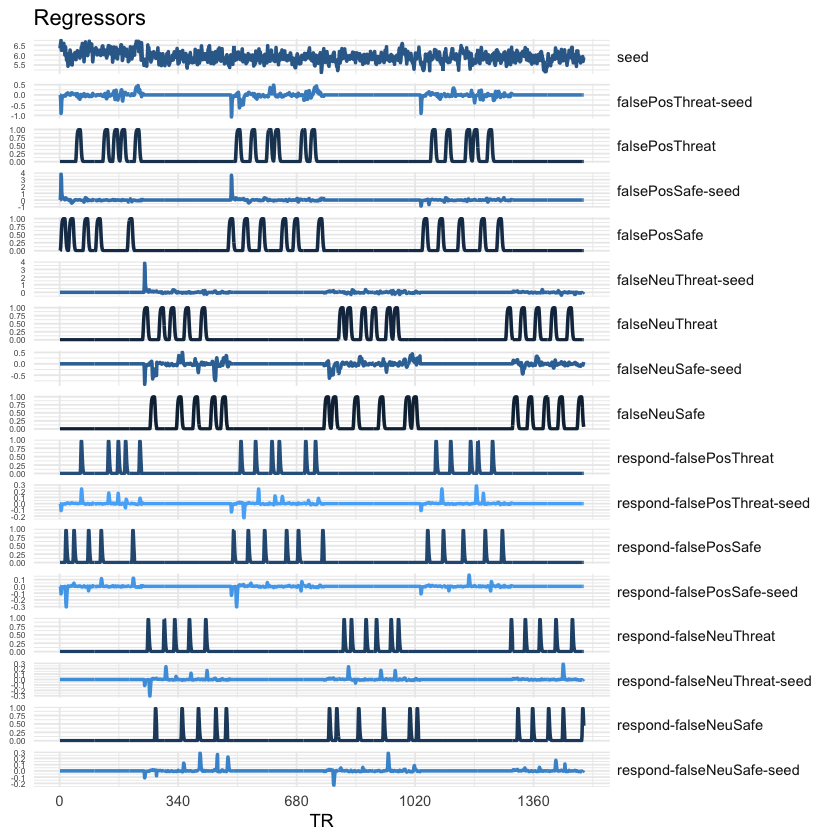

In [9]:
ggplot(df.model, aes(x = TR, y = value)) + 
  geom_line(aes(color = index), size = 1) +
  facet_grid(rows = vars(key), scales = "free") +
  scale_x_continuous(breaks = c(0, 340, 680, 1020, 1360, 1700, 2040)) +
  scale_y_continuous() +
  theme_minimal() +
  labs(y = NULL, title = "Regressors") +
  theme(
        legend.position = 'none',
        strip.text.y = element_text(angle = 0, hjust = 0),
        axis.text.y = element_text(size = 5))

ggsave('../assets/images/MAX_basicModel_gPPI.png')

## Motion parameters

Saving 7 x 7 in image



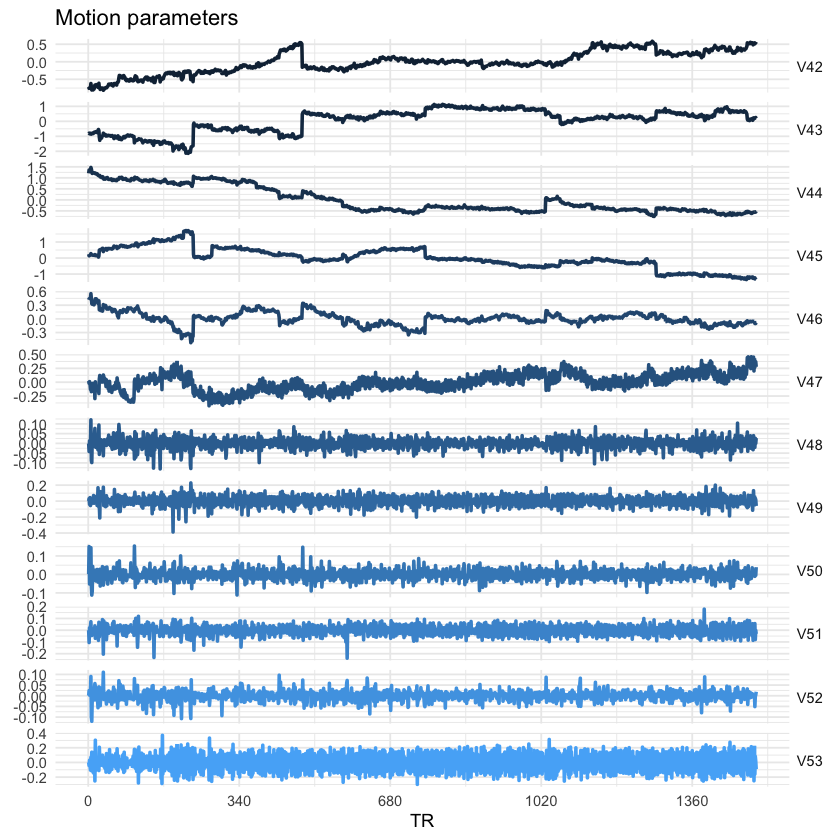

In [10]:
df.long %>% filter(index %in% 42:53) %>%
ggplot(aes(x = TR, y = value)) + 
  geom_line(aes(color = index), size = 1) +
  facet_grid(rows = vars(key), scales = "free") +
  scale_x_continuous(breaks = c(0, 340, 680, 1020, 1360, 1700, 2040)) +
  scale_y_continuous() +
  theme_minimal() +
  labs(y = NULL, title = "Motion parameters") +
  theme(
        legend.position = 'none',
        strip.text.y = element_text(angle = 0, hjust = 0))

ggsave('../assets/images/MAX_basicModel_motionParams.png')